#**Travel Insurance Claim Prediction with ML Classification Model**

**Contents:**

1. Business Problem
1. Exploratory Data Analysis (EDA)
1. Data Cleaning and Modifying
1. Modelling Process and Evaluation
1. Explain AI
1. Conclusion and Recommendation

#Business Problem

**Context**

When someone plans a trip, especially abroad, they will face various risks that could occur. These risks include illness during the trip, ticket cancellations, or even a broken rental car. To protect themselves from these risks, many travelers choose to buy travel insurance. The insurance provides various types of coverage depending on their needs.

However, out of the many insurance policies sold, only a small number are claimed by the insured. When a claim is made, the insurance company needs to ensure that there is enough liquidity available to fulfill its obligations. However, if the liquidity set aside for claims is too large and unused, the insurance company will face a problem, as the liquidity remains idle and does not generate maximum profit.

To address this issue, the insurance company must predict the claims that are likely to occur. With accurate predictions, **the company can allocate enough liquidity for the expected claims, while the remaining liquidity can be invested in other products**. This way, the company not only fulfills its obligations to the claims but also maximizes profit through more efficient liquidity allocation.

**Data source and Dataset Info**

The dataset was taken from Kaggle* and it belongs to a travel insurance company. The dataset consist of 11 columns and 44327 rows. The rows indicates the number of insured and the columns are as follows:
1. Agency: Name of agency.
1. Agency Type: Type of travel insurance agencies.
1. Distribution Channel: Channel of travel insurance agencies.
1. Product Name: Name of the travel insurance products.
1. Gender: Gender of insured.
1. Duration: Duration of travel
1. Destination: Destination of travel.
1. Net Sales: Amount of sales of travel insurance policies.
1. Commision (in value): Commission received for travel insurance agency.
1. Age: Age of insured.
1. Claim: Claim status.

*Source: https://www.kaggle.com/datasets/mhdzahier/travel-insurance

**Goal**

The purpose is to create machine learning model which can predict insured who are likely to claim.

**Analytic Approach**



*   Exploratory Data Analysis (EDA)
*   Data Cleaning and Modifying
    - Remove unused features
    - Duplicate
    - Handling missing value
    - Remove Outlier
    - Feature Modifying
*   Modelling Process and Optimalization
    - Encoding and Scaling
    - Handling Imbalance Classification   
    - Data Splitting
    - Compare performance from some candidate algorithms
    - Hyperparameter Tuning
*   Explain AI
    - Confusion Matrix
    - Feature Coefficient



**Metric Evaluation**

Primary Metric: Recall.
>Our goal is to calculate the number of predictions that make a claim, whether or not the claim is valid. This aims to avoid situations where we predict no claim, but in reality, there is a claim. If liquidity cannot cover the claim submission, the company's reputation in the eyes of customers will be severely damaged.

Second-hand Metric: Accuracy and ROC_AUC.
>Other metric will be used for us to understand more about the model.

#Exploratory Data Analysis (EDA)

**Import Library and Dataset**

In [ ]:
# Library for Data handling
import numpy as np
import pandas as pd

# Library for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Library ignone warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# # Set max columns
# pd.set_option('display.max_columns', None)

In [ ]:
# Load dataset
travel = pd.read_csv('/content/data_travel_insurance.csv')

travel.sample(3)

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
44026,JZI,Airlines,Online,Basic Plan,F,11,VIET NAM,22.0,7.70,24,No
4554,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,6,CANADA,29.7,17.82,57,No
3561,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,20,"KOREA, REPUBLIC OF",69.3,41.58,48,No


In [ ]:
# Summary from dataset
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [ ]:
# Descriptive Statistics - Numerical Data
travel.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [ ]:
# Descriptive Statistics - Categorical Data
travel.describe(include='object')

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


In [ ]:
# Show Unique data and n-unique in every Column
show_unique = []

for x in travel.columns:
  show_unique.append([x, travel[x].nunique(), travel[x].unique(), travel[x].dtype])

table_unique = pd.DataFrame(columns=['Column Name','Number of Unique','Unique Value','Dtype'],
              data=show_unique)

table_unique

,Column Name,Number of Unique,Unique Value,Dtype
0,Agency,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, ...",object
1,Agency Type,2,"[Airlines, Travel Agency]",object
2,Distribution Channel,2,"[Online, Offline]",object
3,Product Name,26,"[Annual Silver Plan, Cancellation Plan, Basic ...",object
4,Gender,2,"[F, nan, M]",object
5,Duration,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 37...",int64
6,Destination,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KO...",object
7,Net Sales,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 8...",float64
8,Commision (in value),915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88,...",float64
9,Age,89,"[57, 33, 26, 59, 28, 36, 22, 39, 27, 48, 43, 5...",int64


#Data Cleaning and Modifying

##Remove Unused Features

In [ ]:
# Drop feature/column gender
travel = travel.drop(columns=['Gender'])

##Duplicate

In [ ]:
# Check for identical duplicate data
travel.duplicated().sum()

5004

In [ ]:
# Remove identical duplicate data from dataframe
travel.drop_duplicates(inplace=True)

# Check the current data count
row, column = travel.shape
print(f"The data has {row} rows and {column} columns remaining")

The data has 39324 rows and 10 columns remaining


##**Missing** Value

In [ ]:
# Check missing value
travel.isnull().sum()

,0
Agency,0
Agency Type,0
Distribution Channel,0
Product Name,0
Duration,0
Destination,0
Net Sales,0
Commision (in value),0
Age,0
Claim,0


There is no missing value

##Outlier

###**Duration**

In [ ]:
# Boxplot - Duration
px.box(travel, x='Duration', title='Duration', width=1000, height=250)

In [ ]:
# Remove data with Duration more than 365 days
travel = travel[travel['Duration'] <366]

###Age

In [ ]:
# Boxplot - Age
px.box(travel, x='Age', title='Duration', width=1000, height=250)

In [ ]:
# Remove data with Age more than 88 years old
travel = travel[travel['Age'] <89]

###Net Sales

In [ ]:
# Count of Net Sales <= 0
travel[travel['Net Sales'] <= 0]['Net Sales'].count()

1675

In [ ]:
# Look for pattern
travel[travel['Net Sales'] <= 0]['Claim'].value_counts()

,count
Claim,
No,1675


In [ ]:
# Remove data with Age more than 88 years old
travel = travel[travel['Net Sales'] > 0]

In [ ]:
# Check the current data count
row, column = travel.shape
print(f"The data has {row} rows and {column} columns remaining")

The data has 36357 rows and 10 columns remaining


##Feature Modifying

| **No** | **Column Name**      | **Unique Sample**                                                                 | **Type Data** | **n-unique** |
|--------|----------------------|----------------------------------------------------------------------------------|---------------|--------------|
| 1      | Agency               | C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB                                       | Nominal       | 15           |
| 2      | Agency Type          | Airlines, Travel Agency                                                          | Nominal       | 2            |
| 3      | Distribution Channel | Online, Offline                                                                  | Nominal       | 2            |
| 4      | Product Name         | Annual Silver Plan, Cancellation Plan, Basic                                     | Nominal       | 26           |
| 5      | Destination          | SINGAPORE, MALAYSIA, INDIA, UNITED STATES                                        | Nominal       | 138          |

**Analysis and Actions:**
All categorical data is of the nominal type, meaning there is no inherent order or ranking between the values. Based on the number of unique values (n-unique), the data can be divided into two categories:
* n unique <10 : will be used directly in the encoding process.
  - Agency Type (2)
  - Distribution Channel (2)
* n unique >10 : will be modified in order to reduce the number of unique values.
  - Destination (138)
  - Product Name (26)
  - Agency (15)

###Claim

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Label Encoding - Mapping
claim_mapping = [
    {'col':'Claim',
     'mapping':{'No':0, 'Yes':1}}
]

# Label Encoding - Initialize
encoder = LabelEncoder()

# Encoding process for "Claim"
travel['Claim'] = encoder.fit_transform(travel['Claim'])

<ipython-input-22-a3e4c178cdcb>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




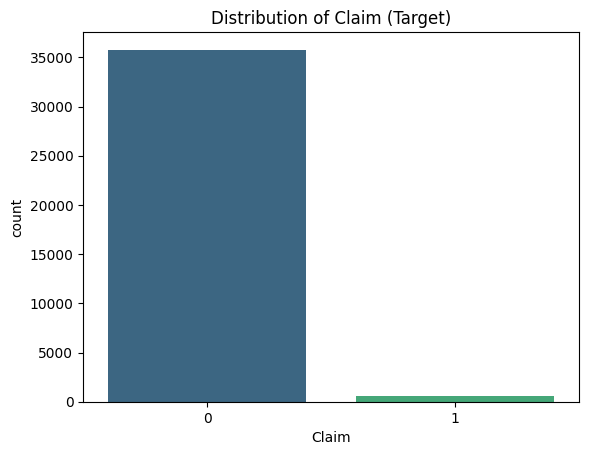

In [ ]:
# Distribution of Claim (Target)
sns.countplot(data=travel, x='Claim', palette='viridis')
plt.title('Distribution of Claim (Target)')
plt.show()

###Destination

In [ ]:
# Country frequency
n_destinasi = travel['Destination'].value_counts().sort_values(ascending=False)

# Top30 countries by counts
top30_destinasi = n_destinasi.head(30)
top30_destinasi.head(5)

,count
Destination,
SINGAPORE,7192
THAILAND,3531
MALAYSIA,2963
CHINA,2821
AUSTRALIA,2184


In [ ]:
# Top30 in 7 new categories ('Region')
asean = ["SINGAPORE", "THAILAND", "MALAYSIA", "INDONESIA", "PHILIPPINES", "VIET NAM", "MYANMAR", "BRUNEI DARUSSALAM", "CAMBODIA"]
east_asia = ["CHINA", "HONG KONG", "JAPAN", "KOREA, REPUBLIC OF", "TAIWAN, PROVINCE OF CHINA"]
south_asia = ["INDIA", "SRI LANKA"]
north_america = ["UNITED STATES", "CANADA"]
europe = ["UNITED KINGDOM", "FRANCE", "ITALY", "GERMANY", "NETHERLANDS", "SPAIN", "SWITZERLAND", "NORWAY"]
oceania = ["AUSTRALIA", "NEW ZEALAND"]
others = ["UNITED ARAB EMIRATES", "SOUTH AFRICA"]

# Define its region every data
def get_region(destination):
    if destination in asean:
        return "Asean"
    elif destination in east_asia:
        return "East Asia"
    elif destination in south_asia:
        return "South Asia"
    elif destination in north_america:
        return "North America"
    elif destination in europe:
        return "Europe"
    elif destination in others:
        return "Others"
    else:
        return "Others" #Countries not in top30

# Add column 'Region' to Dataframe "travel"
travel['Region'] = travel['Destination'].apply(get_region)


In [ ]:
# Check 'Region'
travel['Region'].value_counts()

,count
Region,
Asean,19305
East Asia,7336
Others,4396
Europe,2375
North America,1872
South Asia,1073


In [ ]:
travel.drop(columns='Destination', inplace=True)

###Product Name

In [ ]:
# Top10 Product Name by counts
travel['Product Name'].value_counts().head(10)

,count
Product Name,
Cancellation Plan,10751
2 way Comprehensive Plan,7933
Rental Vehicle Excess Insurance,4779
Basic Plan,3528
Bronze Plan,2578
1 way Comprehensive Plan,1802
Silver Plan,1456
Value Plan,1183
Ticket Protector,691


In [ ]:
# List from Top9 Product name
top9 = travel['Product Name'].value_counts().head(9).index

# Change outside top9 to 'Others'
def get_product(product):
  if product in top9:
    return product
  else:
    return "Others Product"

# Reset column 'Product Name'
travel['Product Name'] = travel['Product Name'].apply(get_product)

In [ ]:
travel['Product Name'].value_counts()

,count
Product Name,
Cancellation Plan,10751
2 way Comprehensive Plan,7933
Rental Vehicle Excess Insurance,4779
Basic Plan,3528
Bronze Plan,2578
1 way Comprehensive Plan,1802
Others Product,1656
Silver Plan,1456
Value Plan,1183


###Agency

In [ ]:
# Counts of Agency
travel['Agency'].value_counts().head(6)

,count
Agency,
EPX,20486
CWT,4779
C2B,4535
JZI,4090
SSI,691
RAB,435


In [ ]:
# List Top4 Agency
agency_unchanged = ['EPX','CWT','C2B','JZI']

# Change outside top4 to 'Others'
def get_agency(agency):
  if agency in agency_unchanged:
    return agency
  else:
    return "Others"

# Reset column 'Agency'
travel['Agency'] = travel['Agency'].apply(get_agency)

In [ ]:
# Check 'Agency' after modifying
travel['Agency'].value_counts()

,count
Agency,
EPX,20486
CWT,4779
C2B,4535
JZI,4090
Others,2467


##Summary Data Cleaning

**Summary of Data Cleaning Process:**
1. Raw data before cleaning:
  - Total data points before cleaning : 44.328

2. Data Removed During Cleaning
  - Duplicate Data : 5.004 (Identical Duplicates)
  - Missing Value : 0 (No Data Removed)
  - Outlier : 2.967 (Outlier)
  - Total Data removed: 7.971

3. Target and Feature Modifying
  - Claim (Target) : convert from Yes/No Option to Binary Number.
  - Destination : convert from 138 n-unique to 7 n-unique
  - Product : convert from 26 n-unique to 10 n-unique
  - Agency : convert from 16 n-unique to 5 n-unique

4. Current data after cleaning and modifying:
  - Total data points : 36.357
  - Percentage of remaining data : 82,02% from Raw Data

In [ ]:
# Download the cleaning dataset
travel.to_csv('New travel cleaned.csv', index=False)

#Modelling Process and Optimalization

**Import Library**

In [ ]:
pip install category_encoders

  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [ ]:
!pip install scikit-learn==1.3.0

  Using cached scikit_learn-1.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.8.0 requires scikit-learn>=1.6.0, but you have scikit-learn 1.3.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.0 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.3.0 which is incompatible.


In [ ]:
# Library : Split
from sklearn.model_selection import train_test_split

# Library : Modular
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# Library : Feature Engineering
from sklearn.preprocessing import OneHotEncoder     #One Hot Encoding
from sklearn.preprocessing import StandardScaler    #Standar Scalling

# Library : Imbalanced Data Handling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Library : Various classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Library : Model Evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score    #Accuracy, Recall, Precision, F1
from sklearn.metrics import RocCurveDisplay,roc_auc_score,PrecisionRecallDisplay
from sklearn.metrics import fbeta_score,average_precision_score,make_scorer
from sklearn.metrics import confusion_matrix, classification_report

# Library : Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Library : Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

##Preparation Before Modelling

###Encoding and Scaling

**Encoding**

| **No** | **Column Name**      | **Unique Sample**                                                                 | **Type Data** | **n-unique** | **Type Encoding** |
|--------|-----------------------|----------------------------------------------------------------------------------|--------------|-------------|-------------------|
| 1      | Agency               | C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB                                       | Nominal      | 15           | One-hot Encoding  |
| 2      | Agency Type          | Airlines, Travel Agency                                                          | Nominal      | 2           | One-hot Encoding  |
| 3      | Distribution Channel | Online, Offline                                                                  | Nominal      | 2           | One-hot Encoding  |
| 4      | Product Name         | Annual Silver Plan, Cancellation Plan, Basic                             | Nominal      | 26          | One-hot Encoding  |
| 5      | Destination          | SINGAPORE, MALAYSIA, INDIA, UNITED STATES                            | Nominal      | 138         | One-hot Encoding  |

In [ ]:
# List for One-hot Encoding
onehot_var = ['Agency','Agency Type','Distribution Channel','Product Name','Region']

# One-Hot Encoding
onehot_encoder = OneHotEncoder(drop='first')

In [ ]:
# Transformer
transformer = ColumnTransformer([
    ('Onehot', onehot_encoder, onehot_var)],
    remainder='passthrough')

**Scaling**

In [ ]:
# Scaling data
scaler = StandardScaler()

###Handling Imbalance Classification

In [ ]:
# Define Sampling Candidate
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

###Define Algorithms and Metrics Evaluation

**Define Model Candidate**

In [ ]:
# Define Algorithm candidate for Classification Model
lor = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=1)
xgb = XGBClassifier(random_state=1, objective='binary:logistic')
lgbm = lgb.LGBMClassifier()

# All the algorithm
models = [lor, knn, dt, rf, xgb, lgbm]

**Define Metric for Model Evaluation**

In [ ]:
# Metric : ROC AUC
score_recall = []
mean_recall = []
std_recall = []

###Data Splitting

In [ ]:
# Define Target (y) and Feature (X)
X = travel.drop(['Claim'], axis=1)
y = travel['Claim']

In [ ]:
# Split data : Train (80%) dan Test (20%) dengan random_state=1
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1)

##Base Model Fitting and Evaluation

**Build Candidate Models with Train Set**

In [ ]:
for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([                #Pipeline
        ('preprocess',transformer),     #Step-1: Preprocessing
        ('scaler', scaler),             #Step-2: Scalling
        ('resampler', smote),           #Step-3: Resampling
        ('model',i),                    #Step-4: Modelling
        ])

    model_cv=cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=skfold,
        scoring='recall'
        )

    score_recall.append(model_cv)
    mean_recall.append(model_cv.mean())
    std_recall.append(model_cv.std())

[LightGBM] [Info] Number of positive: 22895, number of negative: 22895
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2603
[LightGBM] [Info] Number of data points in the train set: 45790, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 22895, number of negative: 22895
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3011
[LightGBM] [Info] Number of data points in the train set: 45790, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

In [ ]:
# Dataframe of Result Any Candidate
pd.DataFrame({
    'models':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'Mean_Recall': mean_recall,
    'Std_Recall':std_recall,
})

,models,Mean_Recall,Std_Recall
0,Logistic Regression,0.663166,0.022876
1,KNN,0.321986,0.034768
2,Decision Tree,0.124548,0.027965
3,Random Forest,0.124502,0.023336
4,XGBoost,0.236102,0.019761
5,LightGBM,0.242507,0.031725


**Testing Candidate Models with Test Set**

In [73]:
# Setting for model
models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Decision Tree' : DecisionTreeClassifier(random_state=1),
    'Random Forest' : RandomForestClassifier(random_state=1),
    'XGB' : XGBClassifier(random_state=1, objective='binary:logistic'),
    'LGBM' : lgb.LGBMClassifier()
}

score_recall_ts = []
score_accuracy_ts = []
score_rocauc_ts = []
y_predict = []

# Prediction in Test Set
for i in models:
    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('resampler', smote),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score_recall_ts.append(recall_score(y_test, y_pred))
    score_accuracy_ts.append(accuracy_score(y_test, y_pred))
    score_rocauc_ts.append(roc_auc_score(y_test, y_pred))

score_before_tuning = pd.DataFrame({
    'Recall': score_recall_ts,
    'Accuracy': score_accuracy_ts,
    'ROC-AUC': score_rocauc_ts
    },index=models.keys())

# Show Dataframe for result
score_before_tuning

[LightGBM] [Info] Number of positive: 28619, number of negative: 28619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2968
[LightGBM] [Info] Number of data points in the train set: 57238, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Recall,Accuracy,ROC-AUC
Logistic Regression,0.706422,0.804593,0.756254
KNN,0.302752,0.856711,0.583946
Decision Tree,0.110092,0.938669,0.530685
Random Forest,0.091743,0.945407,0.525070
XGB,0.201835,0.925330,0.569087
LGBM,0.256881,0.930418,0.598774


##Hyperparameter Tuning

**Preparation for Hyperparameter Tuning**

In [ ]:
# Hyperparameter Setting
hp_space_logreg = [{
    'model__penalty': ['l1','l2','elasticnet','none'],                    #HP - Penalty
    'model__C': np.logspace(-100,100,10),                                   #HP - C Value
    'model__solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],  #HP - Solver
    'model__max_iter': [10,100,500,1000]                                    #HP - Max Iterations
}]

In [ ]:
# Algorithm that we choose
lor = LogisticRegression()

# Algorithm chains
estimator_lor = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('resampler', smote),
    ('model', lor)
])

# Cross-validation with n-split = 5
crossval = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

**Model for Hyperparameter Tuning**

In [ ]:
# Hyperparameter tuning Setting
random_lor = RandomizedSearchCV(
    estimator_lor,
    param_distributions=hp_space_logreg,
    n_iter=25,                            # Number of iteration for random search
    cv=crossval,
    scoring='recall',                  # Evaluation Metric, just 1 so without refit
    n_jobs=-1,
    random_state=1
)

**Hyperparameter Tuning Process**

In [ ]:
# Running Hyperparameter Tuning
random_lor.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py", line 526, in fit
    self._final_estimator.fit(Xt, yt, 

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('Onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Agency',
                                                                                'Agency '
                                                                                'Type',
                                                                                'Distribution '
                                                                                'Channel',
                                                                                'Product '
                                                                                'Name',
                                                                                'Region'])])),
                                             ('scaler', StandardScaler()),
                                             ('resampler',
                                              SMOTE(random_...
                   param_distributions=[{'model__C': array([1.00000000e-100, 1.66810054e-078, 2.78255940e-056, 4.64158883e-034,
       7.74263683e-012, 1.29154967e+011, 2.15443469e+033, 3.59381366e+055,
       5.99484250e+077, 1.00000000e+100]),
                                         'model__max_iter': [10, 100, 500,
                                                             1000],
                                         'model__penalty': ['l1', 'l2',
                                                            'elasticnet',
                                                            'none'],
                                         'model__solver': ['lbfgs', 'liblinear',
                                                           'newton-cg', 'sag',
                                                           'saga']}],
                   random_state=1, scoring='recall')

**Result Hyperparameter Tuning**

In [ ]:
# Result - Best parameters
random_lor.best_params_

{'model__solver': 'lbfgs',
 'model__penalty': 'none',
 'model__max_iter': 10,
 'model__C': 2.7825594022071145e-56}

In [ ]:
# Result - Best Score (Recall)
print(f'Recall in Best parameter combination: {random_lor.best_score_}')

Recall in Best parameter combination: 0.6690101757631822


**Predict Test Set with the Tuned Model**

In [ ]:
# Logistic Regression Tuned Model
model_jagoan = random_lor.best_estimator_

In [ ]:
# Fitting model
model_jagoan.fit(X_train, y_train)

# Predict test set
y_pred_lor_tuned = model_jagoan.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning:

`penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1192: UserWarning:

Setting penalty=None will ignore the C and l1_ratio parameters

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Model Random Forest
model = {'Logistic Regression' : LogisticRegression()}

# Variable Evaluation Metrics
recall_lor_tuned = recall_score(y_test, y_pred_lor_tuned)
accuracy_lor_tuned = accuracy_score(y_test, y_pred_lor_tuned)
roc_auc_lor_tuned = roc_auc_score(y_test, y_pred_lor_tuned)

# Score Evaluation Metric
score_after_tuning = pd.DataFrame({
    'Recall': recall_lor_tuned,
    'Accuracy': accuracy_lor_tuned,
    'ROC-AUC': roc_auc_lor_tuned
    }, index=model.keys())

#show Table
score_after_tuning

,Recall,Accuracy,ROC-AUC
Logistic Regression,0.706422,0.801293,0.754579


**Result from Tuned Model**

In [ ]:
# Variable Summary
summary_after_tuned = classification_report(y_test, y_pred_lor_tuned)

#Show Evaluation Tuned Model
print(summary_after_tuned)

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      7163
           1       0.05      0.71      0.10       109

    accuracy                           0.80      7272
   macro avg       0.52      0.75      0.49      7272
weighted avg       0.98      0.80      0.88      7272



##Summary Modelling Process and Optimalization

**Summary of Modelling Process and Optimalization:**
1. Choose Model: Logistic Regression
  - Train Set: Logistic Regression achieved 66.31%, while other models ranged from 12-32%.
  - Test Set: Logistic Regression achieved 70.64%, while other models ranged from 9-30%.
2. Hyperparameter Tuning for Logistic Regression:
  - Best Parameters:
    - model__solver: 'lbfgs'
    - model__penalty: 'none'
    - model__max_iter: 10
    - model__C: 2,78 x 1e-56
  - Best Results (Recall):
    - Train Set: 66.31%
    - Test Set: 70.64%

#Explain AI

##Confusion Matrix

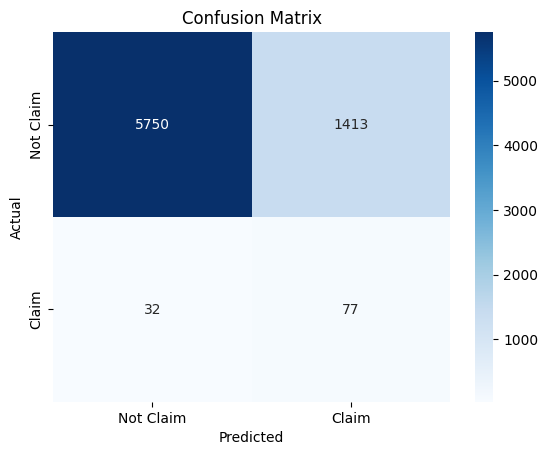

In [ ]:
# Confusion Matrix from Tuned Model
conf_matrix = confusion_matrix(y_test, y_pred_lor_tuned)

# Heatmap for Conf Matrix
sns.heatmap(conf_matrix,                            #Source data
            annot=True,                             #Show number
            fmt='d',                                #Round number
            cmap='Blues',                           #Cell Colour
            xticklabels=['Not Claim', 'Claim'],     #X-Label
            yticklabels=['Not Claim', 'Claim'])     #Y-Label

# Setting Addition
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show
plt.show()

##SHAP

**Import Library**

In [ ]:
import shap

**SHAP Configuration and Calculation**

In [ ]:
# SHAP Explainer Configuration
explainer = shap.Explainer(
    model_jagoan[-1].predict,
    model_jagoan[0].transform(X_test)
)

# SHAP Values
shap_values = explainer(model_jagoan[0].transform(X_test))

**Get Feature Names**

In [ ]:
# Nama Column di Transformer
transformer.get_feature_names_out()

array(['Onehot__Agency_CWT', 'Onehot__Agency_EPX', 'Onehot__Agency_JZI',
       'Onehot__Agency_Others', 'Onehot__Agency Type_Travel Agency',
       'Onehot__Distribution Channel_Online',
       'Onehot__Product Name_2 way Comprehensive Plan',
       'Onehot__Product Name_Basic Plan',
       'Onehot__Product Name_Bronze Plan',
       'Onehot__Product Name_Cancellation Plan',
       'Onehot__Product Name_Others Product',
       'Onehot__Product Name_Rental Vehicle Excess Insurance',
       'Onehot__Product Name_Silver Plan',
       'Onehot__Product Name_Ticket Protector',
       'Onehot__Product Name_Value Plan', 'Onehot__Region_East Asia',
       'Onehot__Region_Europe', 'Onehot__Region_North America',
       'Onehot__Region_Others', 'Onehot__Region_South Asia',
       'remainder__Duration', 'remainder__Net Sales',
       'remainder__Commision (in value)', 'remainder__Age'], dtype=object)

In [ ]:
# nama features
features = list(transformer.get_feature_names_out())

list_features = []

for feature in features:
    list_features.append('_'.join(feature.split('_')[2:]))

list_features

['Agency_CWT',
 'Agency_EPX',
 'Agency_JZI',
 'Agency_Others',
 'Agency Type_Travel Agency',
 'Distribution Channel_Online',
 'Product Name_2 way Comprehensive Plan',
 'Product Name_Basic Plan',
 'Product Name_Bronze Plan',
 'Product Name_Cancellation Plan',
 'Product Name_Others Product',
 'Product Name_Rental Vehicle Excess Insurance',
 'Product Name_Silver Plan',
 'Product Name_Ticket Protector',
 'Product Name_Value Plan',
 'Region_East Asia',
 'Region_Europe',
 'Region_North America',
 'Region_Others',
 'Region_South Asia',
 'Duration',
 'Net Sales',
 'Commision (in value)',
 'Age']

**SHAP - Violin Plot Overview**

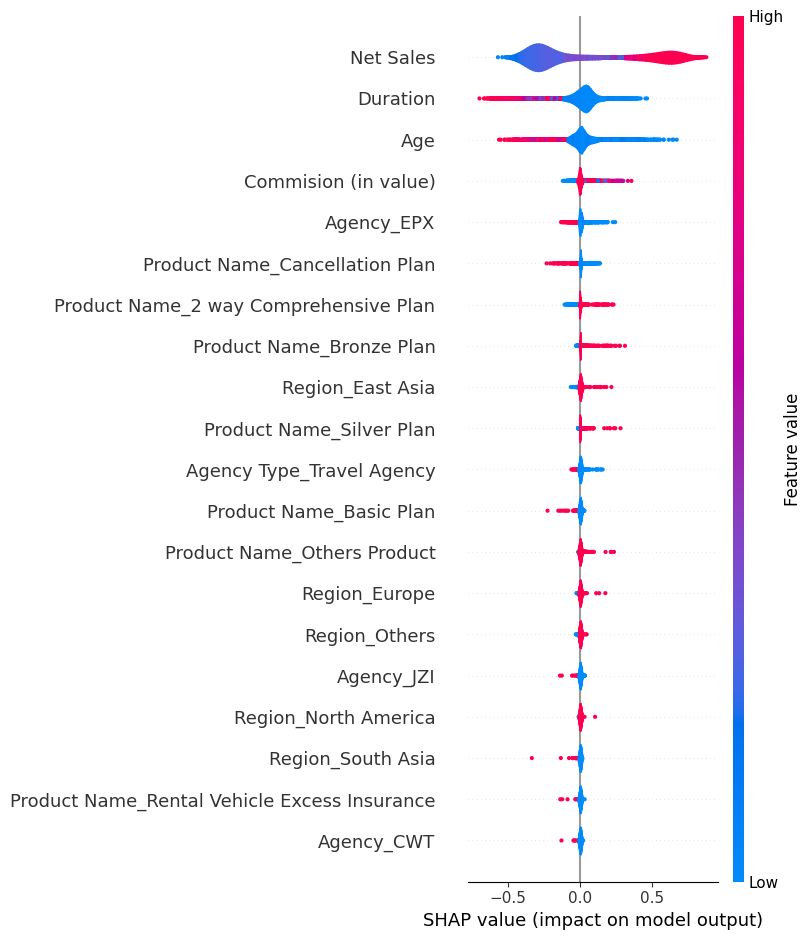

In [ ]:
# SHAP : Violin Plot
shap.summary_plot(
    shap_values,
    feature_names = list_features,
    plot_type='violin'
)